<a href="https://colab.research.google.com/github/JLucas17/TRABALHO-3-DE-TOPICOS-DE-BIG-DATA-EM-PYTHON/blob/main/%C3%81RVORE_DE_DECIS%C3%83O_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementação do algoritmo Árvore De Decisão com a base de dados Iris

In [ ]:
# Importando o pandas

import pandas as pd

In [ ]:
# Importando o dataset iris

# utilizei esse site para base de dados Iris

from sklearn.datasets import load_iris

In [ ]:
# Retornando os dados

data = load_iris()

In [ ]:
# Transformando em um DataFrame
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
iris.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [ ]:
# Selecionando as colunas de pétala e targets

iris1 = iris.loc[iris.target.isin([1,2]),['petal length (cm)','petal width (cm)','target']] # salvei a target na variavel "iris1" para melhor visualização

In [ ]:
# Separando X e Y

X = iris1.drop('target',axis=1)
y = iris1.target

In [ ]:
# Fazendo o train_test_split se baseando na documentação do site scikit-learn.org

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

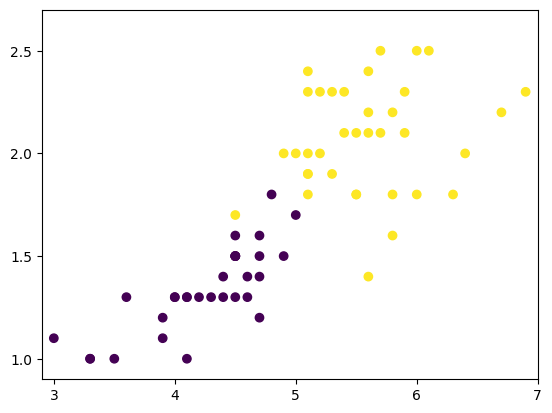

In [ ]:
# Gerando o gráfico de petal length (cm) e petal width (cm)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c=y_train)

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

In [ ]:
# Importando a árvore de decisão

from sklearn import tree

In [ ]:
# Criando o classificador

clf = tree.DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazendo o fit com os dados de treino

clf = clf.fit(X_train, y_train)

In [ ]:
# Verificando o score

clf.score(X_train,y_train)

1.0

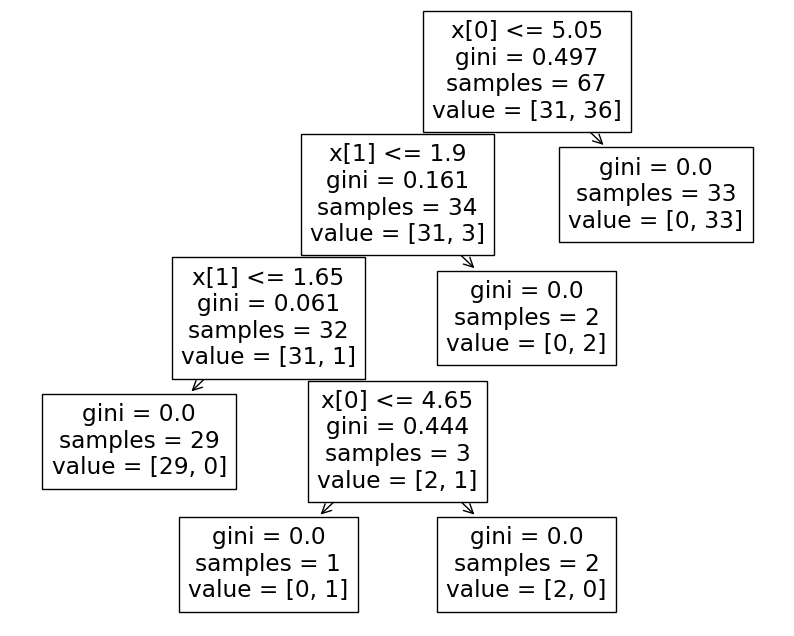

In [ ]:
# Visualizando a árvore de decisão

fig, ax = plt.subplots(figsize=(10,8)) # usei essa função para melhorar a visualização

tree.plot_tree(clf)

plt.show()

In [ ]:
X_train.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2


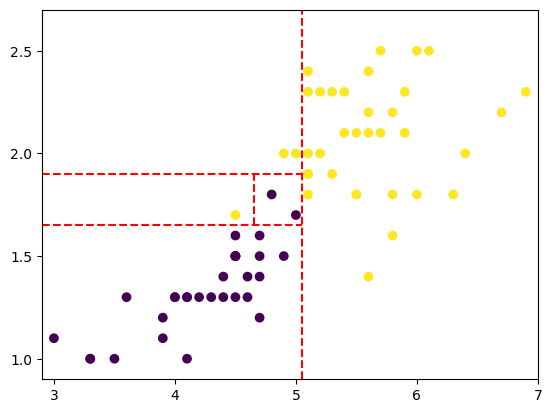

In [ ]:
# Podemos adicionar essas regras no gráfico

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c=y_train)

ax.plot([5.05,5.05],[0.9,2.7],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r')
ax.plot([2.9,5.05],[1.65,1.65],'--r')
ax.plot([4.65,4.65],[1.65,1.9],'--r')

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

In [ ]:
# Fazendo a previsão e avaliando o erro

y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[18,  1],
       [ 6,  8]], dtype=int64)

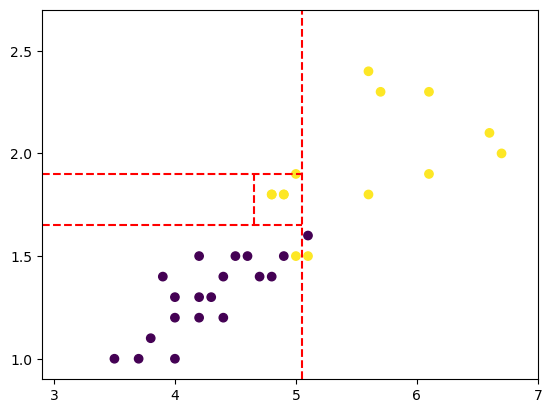

In [ ]:
# Visualizando esses dados de teste no gráfico acima

fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'],
           X_test['petal width (cm)'],
           c=y_test)

ax.plot([5.05,5.05],[0.9,2.7],'--r')
ax.plot([2.9,5.05],[1.9,1.9],'--r')
ax.plot([2.9,5.05],[1.65,1.65],'--r')
ax.plot([4.65,4.65],[1.65,1.9],'--r')

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9, 2.7), yticks=[1,1.5,2,2.5])

plt.show()

In [ ]:
# Separando X e y da base completa

X = iris.drop('target',axis=1)
y = iris.target

In [ ]:
# Fazendo o train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Criando o classificador e fazendo o fit

clf2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [ ]:
# Verificando o score

clf2.score(X_train,y_train)

1.0

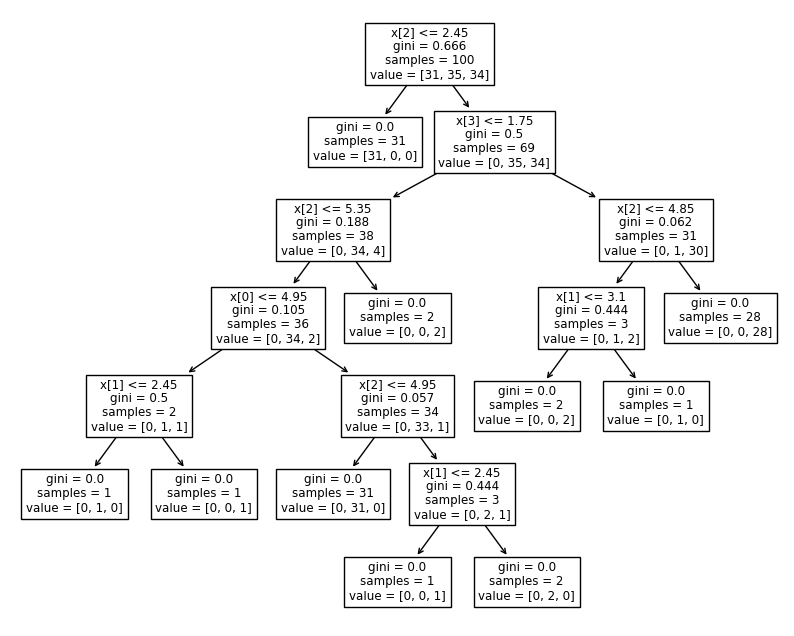

In [ ]:
# Visualizando essa árvore

fig, ax = plt.subplots(figsize=(10,8))

tree.plot_tree(clf2)

plt.show()

In [ ]:
# Fazendo a previsão

y_pred2 = clf2.predict(X_test)

In [ ]:
# Avaliando o modelo

confusion_matrix(y_test,y_pred2)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)